# Identify a target

It is quite common to have to identify a specific star in a field of view. In this tutorial, we will identify the star WASP-12 in the stack image we generated from the [photometry dataset]().

To perform this task the image first need to be plate-solved. Let's load the stack image we plate-solved in [the previous tutorial](plate-solving.ipynb)

In [1]:
from eloy import viz
import matplotlib.pyplot as plt
from astropy.io import fits

hdu = fits.open("calibrated_images/stack_image.fits")[0]

In order to locate our target, let's first detect the stars in this image

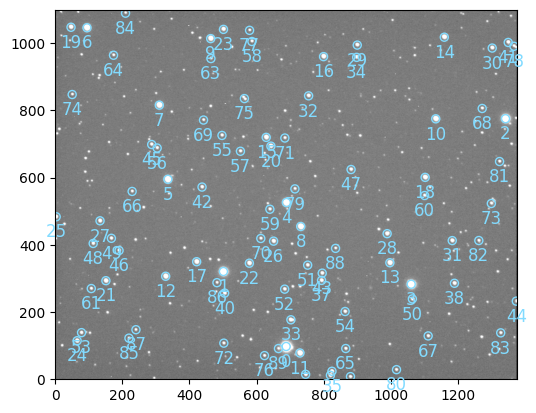

In [2]:
import numpy as np
from eloy import detection

regions = detection.stars_detection(hdu.data)
coords = np.array([r.centroid_weighted[::-1] for r in regions])
plt.imshow(viz.z_scale(hdu.data), cmap="Greys_r", origin="lower")
viz.plot_marks(*coords.T, label=True)

Since the image is plate solved, we can retrieve the RA/Dec coordinates of the detected stars using their pixel positions

In [3]:
from astropy.wcs import WCS

# we load the wcs using the image header
wcs = WCS(hdu.header)
stars_radec = wcs.pixel_to_world(*coords.T)

We can now query the Ra/Dec of our target

In [4]:
from astroquery.mast import Mast

mast = Mast()
target_radec = mast.resolve_object("WASP 12")

And perform the match using a simple feature from `astropy.coordinates.SkyCoord`

In [5]:
target_index = int(target_radec.match_to_catalog_sky(stars_radec)[0])

print(f"Target index is {target_index}")

Target index is 5
